# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
from api_keys import weather_api_key
weather_api_key = "de25d1120715f7c9395569427c8d26e7"
print(weather_api_key)

de25d1120715f7c9395569427c8d26e7


### Generate the Cities List by Using the `citipy` Library

In [9]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 596
['arauco', 'suez', 'hard bargain', 'new norfolk', 'whitehorse', 'albany', 'isafjordur', 'grytviken', 'ushuaia', 'aasiaat', 'edinburgh of the seven seas', 'dunedin', 'tazacorte', 'nova sintra', 'blackmans bay', 'margate', 'invercargill', 'waitangi', 'leava', 'port lincoln', 'camacupa', 'tura', 'saipan', 'sao paulo de olivenca', 'bredasdorp', 'adamstown', 'weno', 'ulladulla', 'taiohae', 'thompson', 'nanyuki', 'antsiranana', 'brooks', 'malmslatt', 'puerto natales', 'yellowknife', 'prince rupert', 'narasapur', 'chos malal', 'labuan', 'nacala', 'cadale', 'mata-utu', 'college', 'belek', 'kuta', 'talnakh', 'port elizabeth', 'wailua homesteads', 'port-aux-francais', 'hawaiian paradise park', 'acapulco de juarez', 'iqaluit', 'ribeira grande', 'sinop', 'kununurra', 'buchanan', 'sabang', 'prince george', 'pizarro', 'bel ombre', 'afaahiti', 'hami', 'vadso', 'hamilton', 'aykhal', 'gorontalo', 'margaret river', 'vila do maio', 'ahau', 'dudinka', 'nouadhibou', 'cruze

In [10]:
url = "https://api.openweathermap.org/data/2.5/weather?"
query_url=f"{url}q={cities[0]}&appid={weather_api_key}"
city_url = requests.get(query_url).json()
pprint(city_url)

{'base': 'stations',
 'clouds': {'all': 49},
 'cod': 200,
 'coord': {'lat': -37.2463, 'lon': -73.3175},
 'dt': 1713216124,
 'id': 3899462,
 'main': {'feels_like': 287.2,
          'grnd_level': 1007,
          'humidity': 86,
          'pressure': 1019,
          'sea_level': 1019,
          'temp': 287.47,
          'temp_max': 287.47,
          'temp_min': 287.47},
 'name': 'Arauco',
 'sys': {'country': 'CL', 'sunrise': 1713179969, 'sunset': 1713219985},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 4, 'gust': 3.52, 'speed': 1.89}}


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
query_url=f"{url}q={city}&appid={weather_api_key}"
j_son = requests.get(query_url).json()
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"
    request = requests.get(query_url).json()
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | arauco
Processing Record 2 of Set 1 | suez
Processing Record 3 of Set 1 | hard bargain
Processing Record 4 of Set 1 | new norfolk
Processing Record 5 of Set 1 | whitehorse
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | isafjordur
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | aasiaat
Processing Record 11 of Set 1 | edinburgh of the seven seas
Processing Record 12 of Set 1 | dunedin
Processing Record 13 of Set 1 | tazacorte
Processing Record 14 of Set 1 | nova sintra
Processing Record 15 of Set 1 | blackmans bay
Processing Record 16 of Set 1 | margate
Processing Record 17 of Set 1 | invercargill
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | leava
Processing Record 20 of Set 1 | port lincoln
Processing Record 21 of Set 1 | camacupa
Processing Record 22 of Set 1 | tura
Processing Record 

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,arauco,-37.2463,-73.3175,287.47,86,49,1.89,CL,1713216124
1,suez,29.9737,32.5263,293.23,58,0,4.06,EG,1713216141
2,hard bargain,26.3167,-77.5667,295.83,64,0,5.84,BS,1713216143
3,new norfolk,-42.7826,147.0587,284.10,84,72,0.98,AU,1713216144
4,whitehorse,60.7161,-135.0538,277.09,34,20,2.57,CA,1713216145


In [15]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,arauco,-37.2463,-73.3175,287.47,86,49,1.89,CL,1713216124
1,suez,29.9737,32.5263,293.23,58,0,4.06,EG,1713216141
2,hard bargain,26.3167,-77.5667,295.83,64,0,5.84,BS,1713216143
3,new norfolk,-42.7826,147.0587,284.10,84,72,0.98,AU,1713216144
4,whitehorse,60.7161,-135.0538,277.09,34,20,2.57,CA,1713216145


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

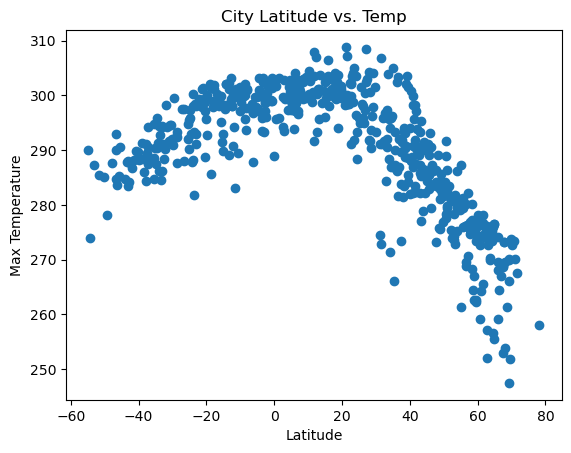

In [18]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("City Latitude vs. Temp")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

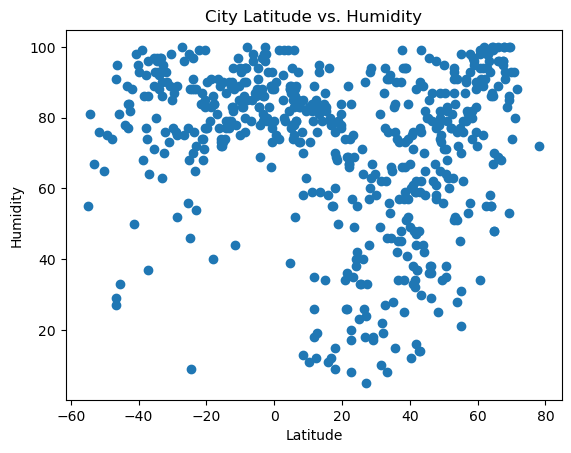

In [19]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

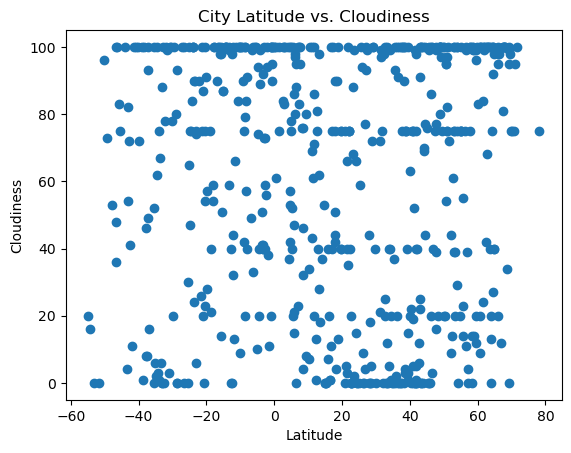

In [20]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

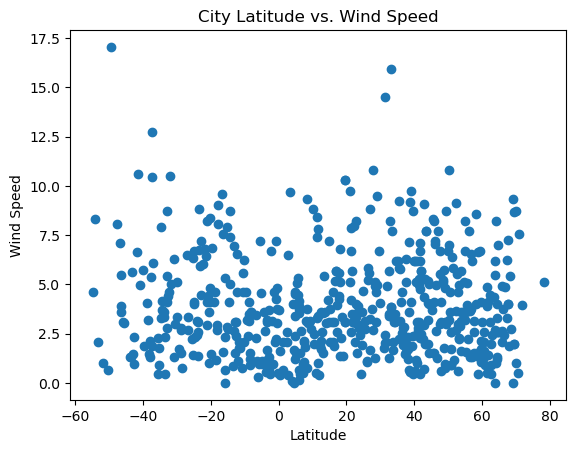

In [21]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs. Wind Speed")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,suez,29.9737,32.5263,293.23,58,0,4.06,EG,1713216141
2,hard bargain,26.3167,-77.5667,295.83,64,0,5.84,BS,1713216143
4,whitehorse,60.7161,-135.0538,277.09,34,20,2.57,CA,1713216145
5,albany,42.6001,-73.9662,290.13,48,12,2.24,US,1713215926
6,isafjordur,66.0755,-23.1240,269.65,89,98,3.77,IS,1713216019


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<=0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,arauco,-37.2463,-73.3175,287.47,86,49,1.89,CL,1713216124
3,new norfolk,-42.7826,147.0587,284.10,84,72,0.98,AU,1713216144
7,grytviken,-54.2811,-36.5092,273.91,81,16,8.30,GS,1713216149
8,ushuaia,-54.8000,-68.3000,289.96,55,20,4.63,AR,1713215884
10,edinburgh of the seven seas,-37.0676,-12.3116,288.50,64,16,6.10,SH,1713216153


###  Temperature vs. Latitude Linear Regression Plot

R squared: 0.7267369709283784
y = -0.55x + 308.59


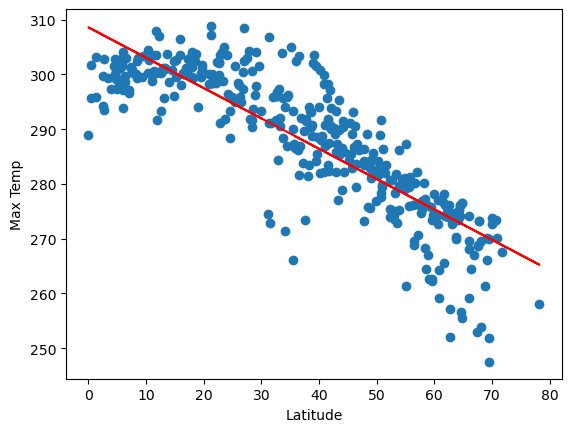

In [30]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"R squared: {rvalue**2}")
print(line_eq)
plt.show()

R squared: 0.5486855494841575
y = 0.31x + 301.31


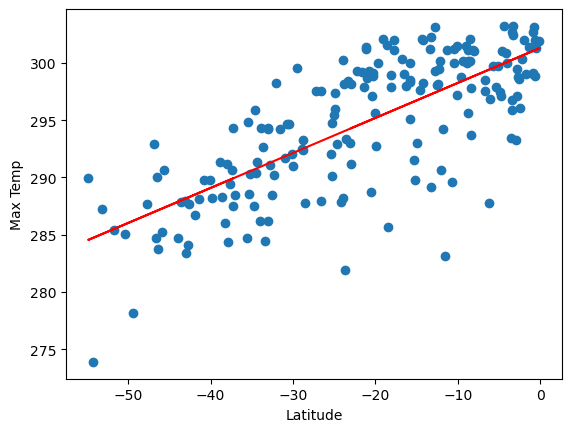

In [31]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"R squared: {rvalue**2}")
print(line_eq)
plt.show()

**Discussion about the linear relationship:** There is a strong correlation of latitude and max temp. For the Northern hemisphere, the slope is negative and for the Southern hemisphere, the slope is positive. 

### Humidity vs. Latitude Linear Regression Plot

R squared: 0.028187583151355614
y = 0.21x + 59.79


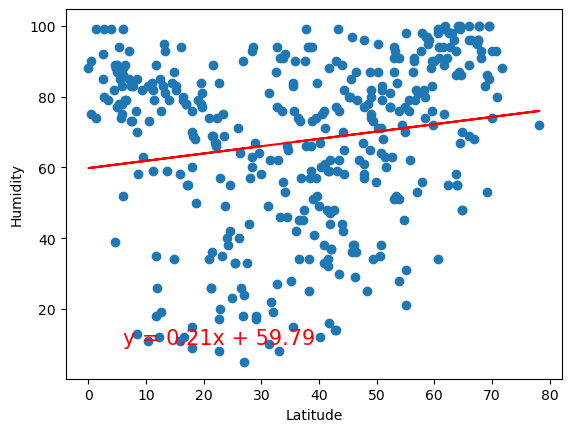

In [32]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"R squared: {rvalue**2}")
print(line_eq)
plt.show()

R squared: 0.056116119618084145
y = 0.24x + 86.79


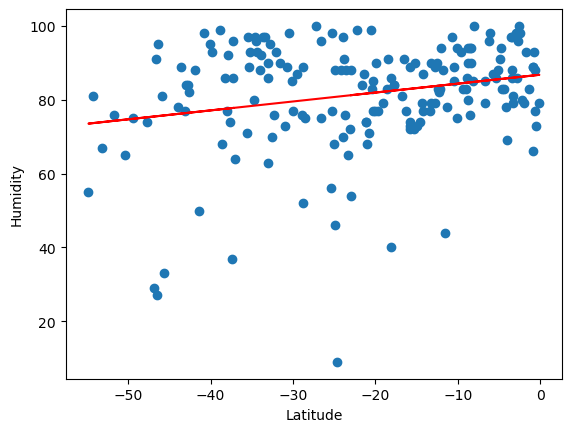

In [33]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"R squared: {rvalue**2}")
print(line_eq)
plt.show()

**Discussion about the linear relationship:** There is no strong relationship between Latitude and Humidity in both the Northern and the Southern hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

R squared: 0.017152356563114552
y = 0.26x + 47.33


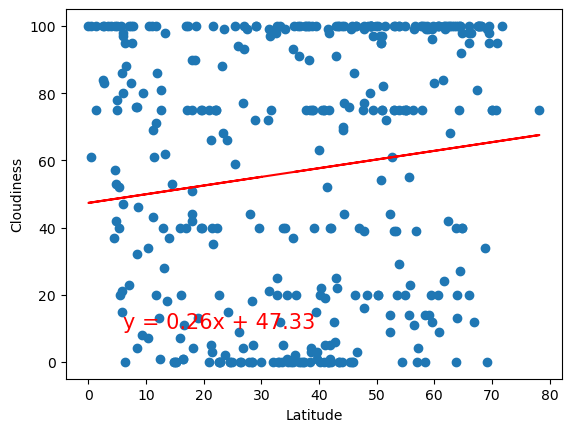

In [34]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"R squared: {rvalue**2}")
print(line_eq)
plt.show()

R squared: 0.03710076418216004
y = 0.49x + 74.54


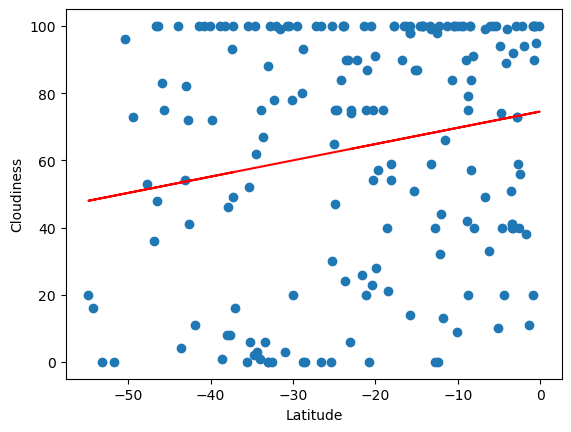

In [35]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"R squared: {rvalue**2}")
print(line_eq)
plt.show()

**Discussion about the linear relationship:** There is almost no relationship between Latitude and Cloudiness. Both slopes are positive and r-squared values are both under 0.05. 

### Wind Speed vs. Latitude Linear Regression Plot

R squared: 0.0019401327915040173
y = 0.01x + 3.63


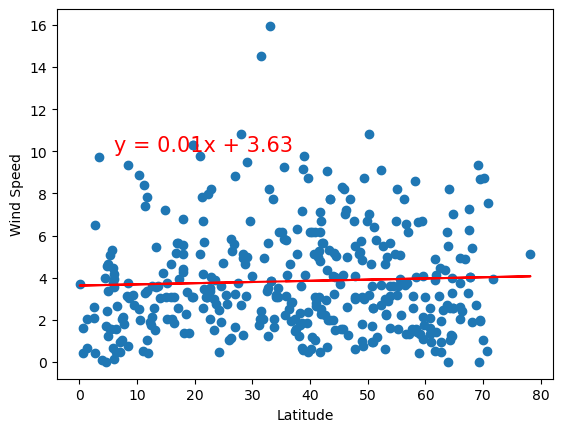

In [36]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"R squared: {rvalue**2}")
print(line_eq)
plt.show()

R squared: 0.05221278441642143
y = -0.04x + 2.88


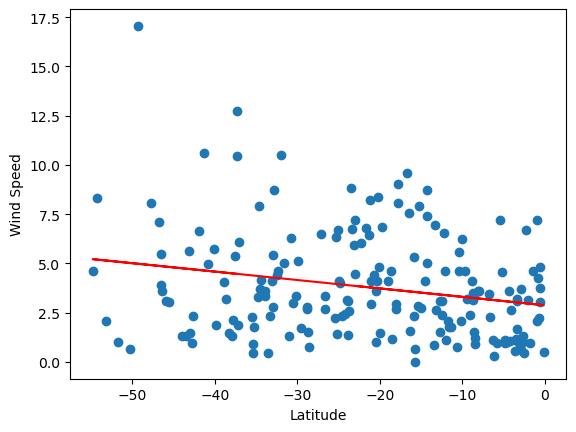

In [38]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"R squared: {rvalue**2}")
print(line_eq)
plt.show()

**Discussion about the linear relationship:** There is little to no relationship between latitude and Wind Speed. The slope for both equations are close to zero indicating whatever x value is inputted, the y value does not change much. i.e. Wind Speed does not depend on latitude. 